In [1]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

**Get the data in shape**

In [2]:
df = pd.read_csv('../data/bikeshare/bikeshare.csv')
df.head()

,rowid,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feelslike,humidity,windspeed,casual,registered,riders
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [4]:
X = df[[a for a in df.columns if a not in ['rowid', 'date', 'season', 'year']]]
y = df['season'].map(lambda x: 1 if (x == 1) else 0)

**Single Model Test**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [6]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
score = decision_tree.score(X_test, y_test)
print(score)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3277
           1       0.92      0.90      0.91      1068

    accuracy                           0.96      4345
   macro avg       0.95      0.94      0.94      4345
weighted avg       0.96      0.96      0.96      4345



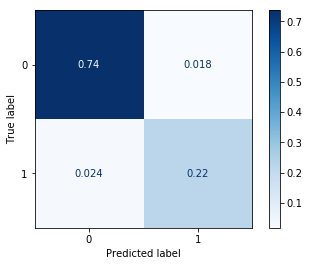

In [16]:
print(classification_report(y_test, y_pred))
plot_confusion_matrix(decision_tree, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
plt.show()

**Multiple model cycle**

In [17]:
classifiers = [SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3277
           1       0.83      0.76      0.79      1068

    accuracy                           0.90      4345
   macro avg       0.88      0.85      0.86      4345
weighted avg       0.90      0.90      0.90      4345



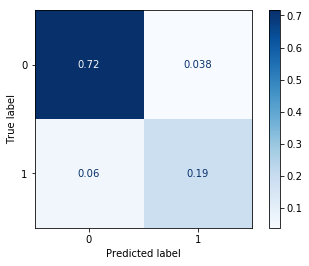

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3277
           1       0.88      0.02      0.04      1068

    accuracy                           0.76      4345
   macro avg       0.82      0.51      0.45      4345
weighted avg       0.79      0.76      0.66      4345



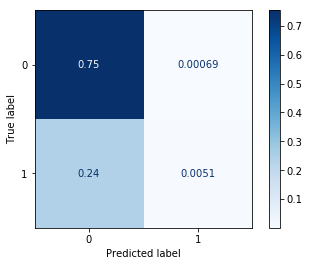

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3277
           1       0.90      0.70      0.78      1068

    accuracy                           0.91      4345
   macro avg       0.90      0.84      0.86      4345
weighted avg       0.91      0.91      0.90      4345



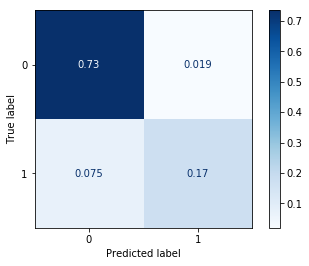

In [20]:
for clf in classifiers:
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
    plt.show()